In [1]:
import csv
from pandas import DataFrame, read_csv
import pandas as pd
import matplotlib.pyplot as plt
from textwrap import wrap
import numpy as np
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual, Layout
import ipywidgets as widgets
import traitlets
from IPython.display import display, HTML
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
from mpl_toolkits.mplot3d import Axes3D

output_file_path = "output.csv"
input_file_path = "census2011.csv"

In [2]:
region_list =           ["E12000001", "E12000002", "E12000003", "E12000004", "E12000005", "E12000006", "E12000007", "E12000008", "E12000009", "W92000004"]
residence_list =        ['C', 'H']
family_list =           [1, 2, 3, 4, 5, 6, -9]
population_list =       [1, 2, 3]
sex_list =              [1, 2]
age_list =              [1, 2, 3, 4, 5, 6, 7, 8]
marital_list =          [1, 2, 3, 4, 5]
student_list =          [1, 2]
country_list =          [1, 2, -9]
health_list =           [1, 2, 3, 4, 5, -9]
ethnic_list =           [1, 2, 3, 4, 5, -9]
religion_list =         [1, 2, 3, 4, 5, 6, 7, 8, 9, -9]
economic_list =         [1, 2, 3, 4, 5, 6, 7, 8, 9, -9]
occupation_list =       [1, 2, 3, 4, 5, 6, 7, 8, 9, -9]
industry_list =         [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, -9]
hours_list =            [1, 2, 3, 4, -9]
socialGrade_list =      [1, 2, 3, 4, -9]
test_list =             [1, 2, 3, 4]

In [3]:
# Lists of readable values.
#Not filled in details for no code required - may do so later
region_list_readable =          ["North East", "North West", "Yorkshire and the Humber", "East Midlands", "West Midlands", "East of England", "London", "South East", "South West", "Wales"]
residence_list_readable =       ['Resident in a communal establishment', 'Not resident in a communal establishment']
family_list_readable =          ["Not in a family", "Married/same-sex civil partnership couple family", "Cohabiting couple family", "Lone parent family (male head)", "Lone parent family (female head)", "Other related family", "No code required"]
population_list_readable =      ["Usual resident", "Student living away from home during term-time", "Short-term resident"]
sex_list_readable =             ["Male", "Female"]
age_list_readable =             ["0 - 15", "16 - 24", "25 - 34", "35 - 44", "45 - 54", "55 - 64", "65 - 74", "75+"]
marital_list_readable =         ["Single", "Married or in registered same-sex civil partnership", "Separated but still legally married/still legally in a same-sex civil partnership", "Divorced or formerly in a same-sex civil partnership which is now legally dissolved", "Widowed or surviving partner from a same-sex civil partnership"]
student_list_readable =         ["Yes", "No"]
country_list_readable =         ["UK", "Non UK", "No code required"]
health_list_readable =          ["Very good health", "Good health", "Fair health", "Bad health", "Very bad health", "No code required"]
ethnic_list_readable =          ["White", "Mixed", "Asian and Asian British", "Black or Black British", "Chinese or other ethnic group", "No code required"]
religion_list_readable =        ["No religion", "Christian", "BuddhistEconomically", "Hindu", "Jewish", "Muslim", "Sikh", "Other religion", "Not stated", "No code required"]
economic_list_readable =        ["Economically active: Employee", "Economically active: Self-employed", "Economically active: Unemployed", "Economically active: Full-time student", "Economically inactive: Retired", "Economically inactive: Student", "Economically inactive: Looking after home or family", "Economically inactive: Long-term sick or disabled", "Economically inactive: Other", "No code required"]
occupation_list_readable =      ["Managers, Directors and Senior Officials", "Professional Occupations", "Associate Professional and Technical Occupations", "Administrative and Secretarial Occupations", "Skilled Trades Occupations", "Caring, Leisure and Other Service Occupations", "Sales and Customer Service Occupations", "Process, Plan and Machine Operatives", "Elementary Occupations", "No code required"]
industry_list_readable =        ["Agriculture, forestry and fishing", "Mining and quarrying; Manufacturing", "Construction", "Wholesale and retail trade; Repair of motor vehicles and motorycycles", "Accommodation and food service activities", "Transport and storage; Information and communication", "Financial and insurance activities; Intermediation", "Real estate activities; Professional, scientific and technical activities; Administrative and support service activities", "Public administration and defence; compulsory social security", "Education", "Human health and social work activities", "Other community, social and personal service activities; Private households employing domestic staff; Extra-territorial organisations and bodies", "No code required"]
hours_list_readable =           ["Part-time: 15 or less hours", "Part-time 16 - 20 hours", "Full-time: 31 - 48 hours", "Full-time: 49+ hours", "No code required"]
socialGrade_list_readable =     ["AB", "C1", "C2", "DE", "No code required"]
test_list_readable =            ["One", "Two", "Three", "Four"]

In [4]:
# Variable names in the input file.
personId = 'Person ID'
region = 'Region'
residence = 'Residence Type'
family = 'Family Composition'
population = 'Population Base'
sex = 'Sex'
age = 'Age'
marital = 'Marital Status'
student = 'Student'
country = 'Country of Birth'
health = 'Health'
ethnic = 'Ethnic Group'
religion = 'Religion'
economic = 'Economic Activity'
occupation = 'Occupation'
industry = 'Industry'
hours = 'Hours worked per week'
socialGrade = 'Approximated Social Grade'
test = 'test'  # Used to demonstrate the error notification when a column is missing.

In [5]:
# Lists containing all the above for easy iterations.
header_list = [region, residence, family, population, sex, age, marital, student,
                country, health, ethnic, religion, economic, occupation, industry,
                hours, socialGrade, test]

variable_list = [region_list, residence_list, family_list, population_list, sex_list, age_list,
                marital_list, student_list, country_list, health_list,
                ethnic_list, religion_list, economic_list, occupation_list,
                industry_list, hours_list, socialGrade_list, test_list]

variable_list_readable = [region_list_readable, residence_list_readable,
                family_list_readable, population_list_readable, sex_list_readable,
                age_list_readable, marital_list_readable, student_list_readable,
                country_list_readable, health_list_readable,ethnic_list_readable,
                religion_list_readable, economic_list_readable, occupation_list_readable,
                industry_list_readable, hours_list_readable, socialGrade_list_readable,
                          test_list_readable]

In [6]:
dataSet = pd.read_csv('census2011.csv', header=0)

In [7]:
def refine_dataset(dataSet):
    """
        Prints type of each variable in the dataSet as well as the occurences of
        each unique value

        :param DataFrame dataSet: The DataFrame to refine
        :return: refined dataSet
        :rtype: DataFrame
    """
    #Drops rows with invalid number of variables
    dataSet.dropna(how='any')

    #Drop all duplicate personal IDs
    dataSet.drop_duplicates(keep='first', inplace=True)
    dataSet.drop_duplicates(personId, keep=False, inplace=True)

    for i in dataSet.ix[:, dataSet.columns != personId]:
        headerIndex = header_list.index(i)
        currentList = variable_list[headerIndex]
        dataSet = dataSet[dataSet[i].isin(currentList)]

    #Write updated dataset to file (For sake of testing comment this out, it's quite slow)
    dataSet.to_csv(output_file_path);

    return dataSet

dataSet = refine_dataset(dataSet)

In [8]:
def print_data_type(header_name):
    """
        Determines and prints the type of a given variable.
        
        :param String header_name: The name of the variable in the list of headers.
    """
    readable_list = variable_list_readable[header_list.index(header_name)]
    
    isNumbers = True
    for i in readable_list:
        try:
            float(i)
        except:
            isNumbers = False
            
    if isNumbers:
        print("Data type numbers.")
        return
            
    isRanges = True
    for i in range(len(readable_list)-2):
        if is_range(readable_list[i]) == False:
            isRanges = False
            break
        
    if isRanges:  # Last element can be [x-y] or [x+]
        s = readable_list[len(readable_list)-1]
        if is_range(s) == False:
            spl = s.split('+')
            if len(spl) != 2:
                isRanges = False
            else:
                if len(spl[1].strip()) != 0:  # The right of the plus should be empty.
                    isRanges = False
                else:
                    try:
                        float(spl[0])
                    except:
                        isRanges = False
                
    if isRanges:
        print("Data type is ranges.")
        return
        
    if len(readable_list) == 2:
        print("Data type is binary.")
        return
    
    print("Data type is keywords.")
    
def is_range(string_to_check):
    spl = string_to_check.split('-')
    if len(spl) != 2:
        return False
    else:
        try:
            float(spl[0])
            float(spl[1])
            return True
        except:
            return False

def readable_data(dataSet):
    """
        Takes dataSet and given two lists of data codes and equivalent readable
        strings where a data code's index matches the readable index will
        return a DataFrame where all codes have been replaced with their human
        readable equivalent

        :param DataFrame dataSet: The DataFrame to be made readable
        :return: readable equivalent of given DataFrame
        :rtype: DataFrame
    """
    #Replaces data code with corresponding readable string
    readableDataSet = dataSet.copy()

    variables_contained = []  # Store the variables that the dataset contains.
    for i in readableDataSet.ix[:, dataSet.columns != personId]:
        variables_contained.append(i)
        headerIndex = header_list.index(i)
        currentList = variable_list[headerIndex]
        currentReadableList = variable_list_readable[headerIndex]
        readableDataSet[i].replace(currentList, currentReadableList, inplace = True)
        
    for var in header_list:
        if var not in variables_contained:
            print("Could not find \'" + var + "\' in input set.")
            
    return readableDataSet

readableDataSet = readable_data(dataSet)

Could not find 'test' in input set.


In [9]:
def descriptive_analysis(dataSet):
    """
        Prints the number of records in a dataSet
        the type of each varaible
        and the occurrences of each unique value
        
        :param DataFrame dataSet: The DataFrame to print stats for
    """
    
    print("\nNumber of records: " + str(len(dataSet)) + "\n")
    
    #Seems janky but does the job,
    #removes person from list (Does not have any effect on given dataSet)
    droppedSet = dataSet.drop(personId, axis=1)
    for headerName in droppedSet:
        # Get group for current header
        group = droppedSet.groupby(headerName)

        # Print number of occurrences of each variable
        print(group.size())
        print_data_type(headerName)
        print("\n")

descriptive_analysis(readableDataSet)


Number of records: 569739

Region
East Midlands               45782
East of England             59411
London                      83582
North East                  26349
North West                  71436
South East                  88083
South West                  53774
Wales                       30976
West Midlands               56875
Yorkshire and the Humber    53471
dtype: int64
Data type is keywords.


Residence Type
Not resident in a communal establishment    559085
Resident in a communal establishment         10654
dtype: int64
Data type is binary.


Family Composition
Cohabiting couple family                             72641
Lone parent family (female head)                     64519
Lone parent family (male head)                        9848
Married/same-sex civil partnership couple family    300960
No code required                                     18851
Not in a family                                      96690
Other related family                                  6230
dt

In [10]:
def plot_pie_distribution_by_header(dataSet, header):
    """
        Takes dataSet and plots distribution of given header

        :param DataFrame dataSet: The DataFrame to be plotted
    """
    %matplotlib notebook

    fig, axis = plt.subplots()
    
    title = "Distribution of " + header
    
    dataSet[header].value_counts().plot(ax=axis, kind='pie')
    plt.ylabel("")
    plt.tight_layout()
    plt.title(title, y=1.02)
    axis.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.savefig('Visualisations/distribution.png')
    plt.show()

<IPython.core.display.Javascript object>


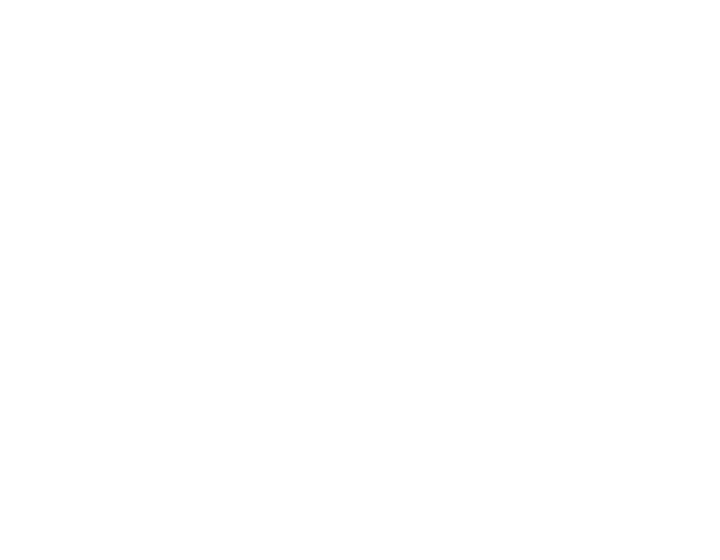

Widget Javascript not detected.  It may not be installed or enabled properly.


Widget Javascript not detected.  It may not be installed or enabled properly.


Widget Javascript not detected.  It may not be installed or enabled properly.


Widget Javascript not detected.  It may not be installed or enabled properly.


Widget Javascript not detected.  It may not be installed or enabled properly.


In [11]:
##      1,        2,          3,        4,         5,         6,         7,       8
## ["0 - 15", "16 - 24", "25 - 34", "35 - 44", "45 - 54", "55 - 64", "65 - 74", "75+"]
%matplotlib notebook 
mfig, maxis = plt.subplots(figsize=(9, 7))

def makeTitle(ageSelection):
        if(len(ageSelection)==8):
            return ""
        if(len(ageSelection)>1):
            return " for the Ages " + ageSelection[0] + " to " + ageSelection[-1]
        else:
            return " for the Age " + ageSelection[0]

def plot_data_records_per_region(dataSet, startAgeGroup, endAgeGroup):
    """
        Takes dataSet and plots regional distribution
        of set in a bar chart

        :param DataFrame dataSet: The DataFrame to be plotted
    """
    ageSelection = []
    for i in range(startAgeGroup, endAgeGroup+1):
        ageSelection.append(age_list_readable[i-1])
    (dataSet[dataSet.Age.isin(ageSelection)])[region].value_counts().plot(ax=maxis, kind='bar')
    plt.ylabel("Number of Records (population)")
    plt.xlabel("Region")
    plt.title("Number of Records for each Region" + makeTitle(ageSelection), y=1.02)
    #plt.tight_layout()
    plt.savefig('Visualisations/region_record_distribution.png')
    plt.show()

plot_data_records_per_region(readableDataSet, 1, 8)
    
def f(b):
    maxis.clear()
    plot_data_records_per_region(readableDataSet, slider.value[0], slider.value[1])
    
caption = widgets.Label(
    value='Advanced Filter Settings:',
    layout=Layout(width='160px'))
checkBox = widgets.Checkbox(
    value=True,
    description = "Disable Filter:", 
    layout = Layout(positioning='right'))
ageDesc = widgets.HTML(
    value="1='0-15' &nbsp;&nbsp;&nbsp;&nbsp;2='16-24' &nbsp;&nbsp;3='25-34' &nbsp;&nbsp;4='35-44' <br>5='45-54'&nbsp;&nbsp; 6='55-64' &nbsp;&nbsp;7='65-74'&nbsp;&nbsp; 8='75+'",
    layout=Layout(width='900px', height='50px'))
slider = widgets.IntRangeSlider(
    description='Age Selection:',
    value=[1, 8],
    min=1,
    max=8,
    readout=True,
    readout_format='x',)
button = widgets.Button(
    description="Update",
    )
button.on_click(f)
l1 = traitlets.link((checkBox, 'value'), (slider, 'disabled'))
l2 = traitlets.link((checkBox, 'value'), (button, 'disabled'))
display(caption, checkBox, ageDesc, slider, button)



<IPython.core.display.Javascript object>


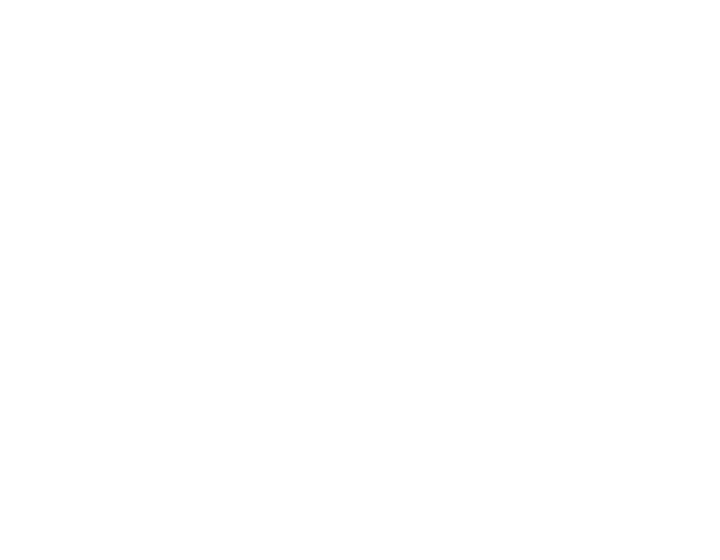

Widget Javascript not detected.  It may not be installed or enabled properly.


Widget Javascript not detected.  It may not be installed or enabled properly.


Widget Javascript not detected.  It may not be installed or enabled properly.


Widget Javascript not detected.  It may not be installed or enabled properly.


Widget Javascript not detected.  It may not be installed or enabled properly.


In [12]:
%matplotlib notebook
mfig, maxis = plt.subplots(figsize=(9, 7))

def makeTitle(ageSelection):
        if(len(ageSelection)==8):
            return ""
        if(len(ageSelection)>1):
            return " for the Ages " + ageSelection[0] + " to " + ageSelection[-1]
        else:
            return " for the Age " + ageSelection[0]

def plot_data_records_per_occupation(dataSet, startAgeGroup, endAgeGroup):
    """
        Takes dataSet and plots occupational distribution
        of set in a bar chart

        :param DataFrame dataSet: The DataFrame to be plotted
    """
    
    ageSelection = []
    for i in range(startAgeGroup, endAgeGroup+1):
        ageSelection.append(age_list_readable[i-1])
    (dataSet[dataSet.Age.isin(ageSelection)])[occupation].value_counts().plot(ax=maxis, kind='bar')
    oldLabels = [ x.get_text() for x in maxis.get_xticklabels() ]
    labels = [ '\n'.join(wrap(l, 30)) for l in oldLabels ]
    maxis.set_xticklabels(labels)
    plt.ylabel("Number of Records (population)")
    plt.xlabel("Description of Occupation")
    plt.title("Number of Records for each Occupation" + makeTitle(ageSelection), y=1.02)
    #plt.tight_layout()
    plt.savefig('Visualisations/occupation_record_distribution.png')
    plt.show()

plot_data_records_per_occupation(readableDataSet, 1, 8)

def f(b):
    maxis.clear()
    plot_data_records_per_occupation(readableDataSet, slider.value[0], slider.value[1])
    
caption = widgets.Label(
    value='Advanced Filter Settings:',
    layout=Layout(width='160px'))
checkBox = widgets.Checkbox(
    value=True,
    description = "Disable Filter:", 
    layout = Layout(positioning='right'))
ageDesc = widgets.HTML(
    value="1='0-15' &nbsp;&nbsp;&nbsp;&nbsp;2='16-24' &nbsp;&nbsp;3='25-34' &nbsp;&nbsp;4='35-44' <br>5='45-54'&nbsp;&nbsp; 6='55-64' &nbsp;&nbsp;7='65-74'&nbsp;&nbsp; 8='75+'",
    layout=Layout(width='900px', height='50px'))
slider = widgets.IntRangeSlider(
    description='Age Selection:',
    value=[1, 8],
    min=1,
    max=8,
    readout=True,
    readout_format='x',)
button = widgets.Button(
    description="Update",
    )
button.on_click(f)
l1 = traitlets.link((checkBox, 'value'), (slider, 'disabled'))
l2 = traitlets.link((checkBox, 'value'), (button, 'disabled'))
display(caption, checkBox, ageDesc, slider, button)

In [13]:
%matplotlib notebook
mfig, maxis = plt.subplots(figsize=(9, 7))

def makeTitle(occSelection):
        if(len(occSelection)==10):
            return ""
        if(len(occSelection)>1):
            res = " for the Occupations "
            for i in range(0,len(occSelection)):
                if(i>0):
                    res = res + ", "
                res = res + "\"" + occSelection[i] + "\""
            return res
        else:
            return " for the Occupation \"" + occSelection[0] + "\""

def plot_data_distribution_by_age(dataSet, occSelection):
    """
        Takes dataSet and plots age distribution
        of set in a pie chart

        :param DataFrame dataSet: The DataFrame to be plotted
    """
   
    (dataSet[dataSet.Occupation.isin(occSelection)])[age].value_counts().plot(ax=maxis, kind='pie',  autopct='%1.0f%%', pctdistance=0.8)
    title_str = '\n'.join(wrap(("Distribution of Sample by Age" + makeTitle(occSelection)), 100))
    plt.title(title_str, y=1.02)
    plt.ylabel("")
    plt.tight_layout()
    maxis.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.savefig('Visualisations/age_record_distribution.png')
    plt.show()

plot_data_distribution_by_age(readableDataSet, occupation_list_readable)

def f(b):
    maxis.clear()
    plot_data_distribution_by_age(readableDataSet, occupationSelector.value)
    
caption = widgets.Label(
    value='Advanced Filter Settings:',
    layout=Layout(width='160px'))
checkBox = widgets.Checkbox(
    value=True,
    description = "Disable Filter:", 
    layout = Layout(positioning='right'))
occupationSelector = widgets.SelectMultiple(
    options=occupation_list_readable,
    value=['Managers, Directors and Senior Officials'],
    description='Occupations',
)
button = widgets.Button(
    description="Update",)
button.on_click(f)
l1 = traitlets.link((checkBox, 'value'), (occupationSelector, 'disabled'))
l2 = traitlets.link((checkBox, 'value'), (button, 'disabled'))
display(caption, checkBox, occupationSelector, button)

<IPython.core.display.Javascript object>

Widget Javascript not detected.  It may not be installed or enabled properly.


Widget Javascript not detected.  It may not be installed or enabled properly.


Widget Javascript not detected.  It may not be installed or enabled properly.


Widget Javascript not detected.  It may not be installed or enabled properly.


In [14]:
import mpld3

%matplotlib notebook
mfig, maxis = plt.subplots(figsize=(9, 7))

def makeTitle(marSelection):
        if(len(marSelection)==5):
            return ""
        if(len(marSelection)>1):
            res = " for the Marital Statuses "
            for i in range(0,len(marSelection)):
                if(i>0):
                    res = res + ", "
                res = res + "\"" + marSelection[i] + "\""
            return res
        else:
            return " for the Marital Status \"" + marSelection[0] + "\""

def plot_data_distribution_by_ec_activity(dataSet, marSelection):
    """
        Takes dataSet and plots distribution of economic activity
        of set in a pie chart

        :param DataFrame dataSet: The DataFrame to be plotted
    """
    pie = (dataSet.loc[dataSet['Marital Status'].isin(marSelection)])[economic].value_counts().plot(ax=maxis, kind='pie',  autopct='%1.0f%%', pctdistance=0.8)
    title_str = '\n'.join(wrap(("Distribution of Sample by Economic Activity" + makeTitle(marSelection)), 100))
    plt.title(title_str, y=1.02)
    plt.ylabel("")
    maxis.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.savefig('Visualisations/economic_record_distribution.png', bbox_inches='tight')
    
    # still working on this tooltip thing
    tooltip = mpld3.plugins.PointLabelTooltip(pie, labels=economic_list_readable)
    mpld3.plugins.connect(mfig, tooltip)
    mpld3.enable_notebook()
    #plt.show()

plot_data_distribution_by_ec_activity(readableDataSet, marital_list_readable)

def f(b):
    maxis.clear()
    plot_data_distribution_by_ec_activity(readableDataSet, maritialSelector.value)
    
caption = widgets.Label(
    value='Advanced Filter Settings:',
    layout=Layout(width='160px'))
checkBox = widgets.Checkbox(
    value=True,
    description = "Disable Filter:", 
    layout = Layout(positioning='right'))
maritialSelector = widgets.SelectMultiple(
    options=marital_list_readable,
    value=[marital_list_readable[0]],
    description='Marital Status',
)
button = widgets.Button(
    description="Update",)
button.on_click(f)
l1 = traitlets.link((checkBox, 'value'), (maritialSelector, 'disabled'))
l2 = traitlets.link((checkBox, 'value'), (button, 'disabled'))
display(caption, checkBox, maritialSelector, button)

ImportError: No module named 'mpld3'

In [ ]:
%matplotlib notebook
mfig, maxis = plt.subplots(figsize=(9, 7))

def makeTitle(cobSelection):
        if(len(cobSelection)==3):
            return ""
        if(len(cobSelection)>1):
            res = " for the Countries of Birth "
            for i in range(0,len(cobSelection)):
                if(i>0):
                    res = res + ", "
                res = res + "\"" + cobSelection[i] + "\""
            return res
        else:
            return " for the Country of Birth \"" + cobSelection[0] + "\""

def plot_ec_activity_by_region(dataSet, cobSelection):
    """
        Takes dataSet and plots distribution of economic activity,
        by region, of set in a pie chart

        :param DataFrame dataSet: The DataFrame to be plotted
    """
    dataSet = dataSet.loc[dataSet[economic] == economic_list_readable[0]]
    (dataSet.loc[dataSet['Country of Birth'].isin(cobSelection)])[region].value_counts().plot(ax=maxis, kind='pie',  autopct='%1.0f%%', pctdistance=0.8)
    title_str = '\n'.join(wrap(("Distribution of Economically Active People by Region" + makeTitle(cobSelection)), 100))
    plt.title(title_str, y=1.02)
    plt.ylabel("")
    plt.tight_layout()
    maxis.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.savefig('Visualisations/economic_record_distribution_by_region.png')
    plt.show()

plot_ec_activity_by_region(readableDataSet, country_list_readable)

def f(b):
    maxis.clear()
    plot_ec_activity_by_region(readableDataSet, cobSelector.value)
    
caption = widgets.Label(
    value='Advanced Filter Settings:',
    layout=Layout(width='160px'))
checkBox = widgets.Checkbox(
    value=True,
    description = "Disable Filter:", 
    layout = Layout(positioning='right'))
cobSelector = widgets.SelectMultiple(
    options=country_list_readable,
    value=[country_list_readable[0]],
    description='Country of Birth',
)
button = widgets.Button(
    description="Update",)
button.on_click(f)
l1 = traitlets.link((checkBox, 'value'), (cobSelector, 'disabled'))
l2 = traitlets.link((checkBox, 'value'), (button, 'disabled'))
display(caption, checkBox, cobSelector, button)

In [ ]:
%matplotlib notebook
mfig, maxis = plt.subplots(figsize=(9, 7))

def makeTitle(famSelection):
        if(len(famSelection)==7):
            return ""
        if(len(famSelection)>1):
            res = " for the Family Compositions "
            for i in range(0,len(famSelection)):
                if(i>0):
                    res = res + ", "
                res = res + "\"" + famSelection[i] + "\""
            return res
        else:
            return " for the Family Composition \"" + famSelection[0] + "\""

def plot_ec_activity_by_age(dataSet, famSelection):
    """
        Takes dataSet and plots distribution of economic activity,
        by age, of set in a pie chart

        :param DataFrame dataSet: The DataFrame to be plotted
    """
    dataSet = dataSet.loc[dataSet[economic] == economic_list_readable[0]]
    (dataSet.loc[dataSet['Family Composition'].isin(famSelection)])[age].value_counts().plot(ax=maxis, kind='pie',  autopct='%1.0f%%', pctdistance=0.8)
    title_str = '\n'.join(wrap(("Distribution of Economically Active People by Age" + makeTitle(famSelection)), 100))
    plt.title(title_str, y=1.02)
    plt.ylabel("")
    plt.tight_layout()
    maxis.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.savefig('Visualisations/economic_record_distribution_by_age.png')
    plt.show()

plot_ec_activity_by_age(readableDataSet, family_list_readable)

def f(b):
    maxis.clear()
    plot_ec_activity_by_age(readableDataSet, famSelector.value)
    
caption = widgets.Label(
    value='Advanced Filter Settings:',
    layout=Layout(width='160px'))
checkBox = widgets.Checkbox(
    value=True,
    description = "Disable Filter:", 
    layout = Layout(positioning='right'))
famSelector = widgets.SelectMultiple(
    options=family_list_readable,
    value=[family_list_readable[0]],
    description='Family Composition',
)
button = widgets.Button(
    description="Update",)
button.on_click(f)
l1 = traitlets.link((checkBox, 'value'), (famSelector, 'disabled'))
l2 = traitlets.link((checkBox, 'value'), (button, 'disabled'))
display(caption, checkBox, famSelector, button)

In [ ]:
%matplotlib notebook
mfig, maxis = plt.subplots(figsize=(9, 7))

def makeTitle(famSelection):
        if(len(famSelection)==7):
            return ""
        if(len(famSelection)>1):
            res = " for the Family Compositions "
            for i in range(0,len(famSelection)):
                if(i>0):
                    res = res + ", "
                res = res + "\"" + famSelection[i] + "\""
            return res
        else:
            return " for the Family Composition \"" + famSelection[0] + "\""

def plot_student_working_hours(dataSet, famSelection):
    """
        Takes dataSet and plots distribution of working hours for
        economically identified students

        :param DataFrame dataSet: The DataFrame to be plotted
    """
    economicStudentDataSet = dataSet[(dataSet[economic] == economic_list_readable[3])
                      | (dataSet[economic] == economic_list_readable[5])]
    
    (dataSet.loc[dataSet['Family Composition'].isin(famSelection)])[hours].value_counts().plot(ax=maxis, kind='pie',  autopct='%1.0f%%', pctdistance=0.8)
    plt.ylabel("")
    #plt.tight_layout()
    title_str = '\n'.join(wrap(("Distribution of Working Hours of Students" + makeTitle(famSelection)), 100))
    plt.title(title_str, y=1.02)
    maxis.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.savefig('Visualisations/student_working_hours.png', bbox_inches='tight')
    plt.show()

plot_student_working_hours(readableDataSet, family_list_readable)

def f(b):
    maxis.clear()
    plot_student_working_hours(readableDataSet, famSelector.value)
    
caption = widgets.Label(
    value='Advanced Filter Settings:',
    layout=Layout(width='160px'))
checkBox = widgets.Checkbox(
    value=True,
    description = "Disable Filter:", 
    layout = Layout(positioning='right'))
famSelector = widgets.SelectMultiple(
    options=family_list_readable,
    value=[family_list_readable[0]],
    description='Family Composition',
)
button = widgets.Button(
    description="Update",)
button.on_click(f)
l1 = traitlets.link((checkBox, 'value'), (famSelector, 'disabled'))
l2 = traitlets.link((checkBox, 'value'), (button, 'disabled'))
display(caption, checkBox, famSelector, button)

In [ ]:
def print_student_discrepancies(dataSet):
    """
        Takes dataSet and prints difference between student numbers
        and student-based economic activity

        :param DataFrame dataSet: The DataFrame to be plotted
    """
    economicStudentDataSet = dataSet[(dataSet[economic] == economic_list_readable[3])
                      | (dataSet[economic] == economic_list_readable[5])]

    identifiedStudentDataSet = dataSet[dataSet[student] == student_list_readable[0]]
    
    sizeEconomic = len(identifiedStudentDataSet)
    sizeStudent = len(economicStudentDataSet)

    if(sizeEconomic > sizeStudent):
        print("More economically identified students - discrepancy of " + str(sizeEconomic - sizeStudent) + " records.")
    elif(sizeEconomic < sizeStudent):
        print("More student identified students - discrepancy of " + str(sizeStudent - sizeEconomic) + " records.")
    else:
        print("No discrepancy found")

print_student_discrepancies(readableDataSet)

# Easy 1

##Table A - Region Industries Number_of_records

In [ ]:
reg_ind = readableDataSet.groupby([region, industry])
reg_ind.size()  # Does not produce full table. Prints '...' to avoid writing too much.

##Table B - Occupation Social_Grade Number_of_records

In [ ]:
occ_soc = readableDataSet.groupby([occupation, socialGrade])
occ_soc.size()

# Medium 1: Function to build a 3D Plot

In [ ]:
def plot3d(table, list1, list2, outputfilename):
    """
        Produces a 3D Bar plot from the given table and saves it in a specified file.
        
        :param table list: a one diminsional list of values
            it's length must be the product of the lengths of the next two arguments
        :param list1 list: the values from this list will be put as ticks on the y-axis
        :param list2 list: the values from this list will be put as ticks on the x-axis
        :param outputfilename str: the path to the file where the produced figure should be saved
    """
    # Deep copy and sort lists alphabetically
    # because the tables provided by pandas are sorted this way.
    l1s = [x for x in list1]
    l1s.sort()
    l1 = len(l1s)
    l2s = [x for x in list2]
    l2s.sort()
    l2 = len(l2s)
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    for i in range(l1):  # Iterate the table in l1 chuncks of size l2.
        ax.bar(range(l2), table[(i*l2):(i*l2+l2)], zs=i, zdir='y')

    # Sets the number of ticks
    plt.locator_params(axis='x', nticks=l2)
    plt.locator_params(axis='y', nticks=l1)

    # Assign and align tick labels.
    ax.set_xticklabels(l2s, rotation=30, va='top', ha='right')
    ax.set_yticklabels(l1s, rotation=-15, va='top', ha='left')

    # Make the figure larger, so that all the labels fit.
    fig.tight_layout()#pad=-60)

    ax.set_zlabel("Number of records")
    # puts the Z labels on the left (switches two pairs of planes)
    # from http://stackoverflow.com/questions/25068666/label-manipulation-for-3d-plot-using-matplotlib
    tmp_planes = ax.zaxis._PLANES 
    ax.zaxis._PLANES = ( tmp_planes[2], tmp_planes[3], 
                         tmp_planes[0], tmp_planes[1], 
                         tmp_planes[4], tmp_planes[5])

    fig.savefig(outputfilename, bbox_inches='tight')

In [ ]:
plot3d(reg_ind.size(), region_list_readable, industry_list_readable,
       "Visualisations/region_industry_3d.png")

In [ ]:
plot3d(occ_soc.size(), occupation_list_readable, socialGrade_list_readable,
       "Visualisations/occupation_socialgrade_3d.png")